## Project :  Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion]


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project,i will be working to understand the results of an A/B test run by an e-commerce website.My goal is  to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision. I will analyze the company data and divide it in to three parts which are:

-Part I - Probability.


-Part II - A/B Test.


-Part III - Regression.


After gathering all information that i need from this data, it will help me to prove whether the new page is better than the old page.



<a id='probability'></a>
#### Part I - Probability

First i will import my libraries.

In [47]:
import pandas as pd
import numpy as np
import random
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, I read in the `ab_data.csv` data and Store it in `df`.  



In [48]:
#  Read in the dataset and take a look at the top few rows here:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [49]:
#find the number of rows in the dataset.
df.shape

(294478, 5)

In [57]:
 # The number of unique users in the dataset.
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [58]:
# The proportion of users converted.
mean_converted= df.converted.mean()
mean_converted

0.11965919355605512

In [59]:
# the group is control while landing page is new.
control_new= len(df.query('group == "control" and landing_page == "new_page"'))
control_new

1928

In [60]:
# the group is treatment while landing page is old.
treatment_old = len(df.query('group == "treatment" and landing_page == "old_page"'))
treatment_old

1965

In [61]:
#The number of times the new_page and treatment don't match.
add = control_new + treatment_old
add

3893

In [62]:
# Find missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [63]:
# To make sure there is no missing values.
(df.isnull()).sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, I cannot be sure if this row truly received the new or old page.  

a. I create a new dataset and store my new dataframe in **df2**.

In [64]:
# I should only use the rows that i can feel confident in the accuracy of the data. Here i will remove the rows where the landing_page and group columns don't match.
df2 = df.drop(df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].index)
df2 = df2.drop(df2[(df2['group'] == 'control') & (df2['landing_page'] == 'new_page')].index)

In [65]:
len(df2.query('group == "treatment" & landing_page != "new_page"')) + len(df2.query('group != "treatment" & landing_page == "new_page"'))

0

In [66]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.`Analyzing **df2** 

a. How many unique **user_id**s are in **df2**?

In [67]:
# First i want to know the size of the DataFrame.
df2.shape

(290585, 5)

In [68]:
# Finding number of unique values.
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [69]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**. I will try to locate and remove it.

In [70]:
# How many users_id are repeated?.
sum(df2.user_id.duplicated())

1

In [71]:
# Find the one repeated user.
duplicated_id = df2[df2.user_id.duplicated()]
duplicated_id.user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [72]:
# This is the row information for the repeat user_id 
duplicated_id

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Removing **one** of the rows with a duplicate **user_id**, but keep my dataframe as **df2**.

In [73]:
df2.drop(2893, inplace=True)
df2.shape[0]

290584

`4.` Using **df2** to calculate probability.

a. What is the probability of an individual converting regardless of the page they receive?

In [74]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [75]:
df2.query('group=="control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [76]:
df2.query('group=="treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [77]:
len(df2.query('landing_page== "new_page"'))/ len(df2)

0.5000619442226688

e. Considering my results from parts (a) through (d) above to help me explain my conclusion below. 

There is no sufficient evidence to conclude that the **new treatment page** leads to more conversions because here we can see the **control group** has more conversion rate which is **12.03%** while **treatment group** has conversion rate **11.88%**,there is no significant difference to decide that the new page is better. Therefore we need to have more information to decide.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, I could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do i stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do I run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, I need to make the decision just based on all the data provided.  If i want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, my **null and alternative hypotheses** will be :



$H_{0} : p_{new} - p_{old }\leq 0$

$H_{A} : p_{new} - p_{old}> 0$

$\alpha = 0.05$



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

 I will use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

 I will Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Using the cells below to provide the necessary parts of this simulation.  

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [78]:
P_new = df2['converted'].mean()
P_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [79]:
P_old = df2['converted'].mean()
P_old

0.11959708724499628

In [80]:
# Because they are the same number, the difference will be zero.
P_new - P_old

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [81]:
n_new = len(df2.query('group == "treatment"'))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [82]:
n_old = len(df2.query('group == "control"'))
n_old

145274

e. Simulating $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null and storing these $n_{new}$ 1's and 0's in **new_page_converted**.

In [83]:
new_page_converted = np.random.choice([1, 0], size = n_new, p = [P_new , (1-P_new)])
new_page_converted.mean()

0.11882871103158764

f. Simulating $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null and Storing these $n_{old}$ 1's and 0's in **old_page_converted**.

In [87]:
old_page_converted = np.random.choice([1, 0], size = n_old, p = [P_old, (1- P_old) ])
old_page_converted.mean()

0.12028305133747264

g. Find $p_{new}$ - $p_{old}$ for my simulated values from part (e) and (f).

In [88]:
P_diff = (new_page_converted.mean() - old_page_converted.mean())
P_diff

-0.0014543403058849963

h. Creating 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process that i used in parts (a) through (g) above. Storing all 10,000 values in a NumPy array called **p_diffs**.

In [90]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size = n_new, p = [P_new, (1 - P_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size = n_old, p = [P_old, (1 - P_old)]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  

In [91]:
lower, upper = np.percentile(p_diffs, .5), np.percentile(p_diffs, 99.5)
lower, upper

(-0.0031406893695141262, 0.0029231181969759921)

Text(0.5,1,'Plot of 10000 simulated p_diffs')

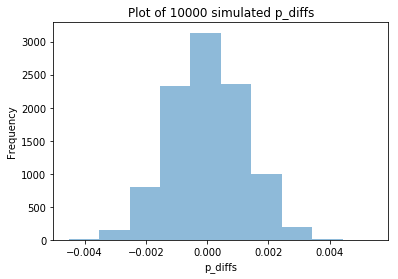

In [91]:

plt.hist(p_diffs, alpha= 0.5);
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10000 simulated p_diffs')

**After plotting we can see here a normal distribution.**

In [92]:
# Here i find the observed difference in conversion rate between control and treatment group.
obs_diffs = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()

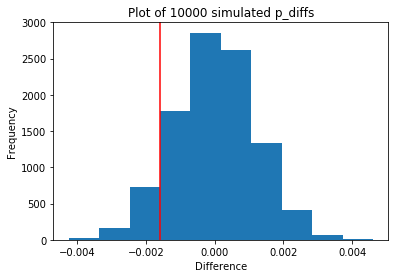

In [95]:
p_diffs= np.array(p_diffs)
null_vals=np.random.normal(0, p_diffs.std(),p_diffs.size)
plt.hist(null_vals);
plt.axvline( x= obs_diffs , color='red')
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.title('Plot of 10000 simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [96]:

(null_vals> obs_diffs).mean()

0.90710000000000002

k. I explain here what i have just computed in part **j.** 

 #### I calculated $\alpha$ value which is Known as P-value. If P-value is below 0.05 we reject the null hypothesis. As we can see the P-value here is 0.906 which is far above 0.05, therefore we fail to reject the null hypothesis meaning the old page is better than new page.

l.I could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. The `n_old` and `n_new` here will refer to the number of rows associated with the old page and new pages, respectively.

In [94]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
n_old = len(df2.query('group == "control"'))
n_new = len(df2.query('group == "treatment"'))

m. Now i use `stats.proportions_ztest` to compute  test statistic and p-value.  

In [95]:
test_statistic , p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
test_statistic , p_value

(1.3109241984234394, 0.90505831275902449)

n. First i observe the z-score and p-value that i computed in the previous question mean for the conversion rates of the old and new pages?. Then i compare my findings with the results in  parts **j.** and **k.**?

##### The P_value here is 0.905 which is almost the same result in cell j, so here i fail to reject the null hypthesis ,concluding  again that there is a 90.5% chance that the old page is better than the new one. The z-score is 1.310 which is the number of standard deviation from the mean, so it has the same information.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, i will see that the result iachieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should i be performing in this case?

**Here i will perform logestic regression**

b. The goal is to use **statsmodels** to fit the regression model that i specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, first i need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Adding an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [99]:
df2 ['intercept'] = 1
df2[['control','ab_page']] = pd.get_dummies(df2['group'])

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [100]:
df2.drop(['control'], axis=1 , inplace= True )
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0


c. Using **statsmodels** to instantiate my regression model on the two columns that i created in part b., then fitting the model by using the two columns which i created in part **b.** to predict whether or not an individual converts. 

In [101]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of my model below

In [102]:
#here i use stats.chisqprob because an error appeared while performing summary function.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        11:20:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [103]:
np.exp(-0.0150)

0.98511193960306265

In [104]:
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>   What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

#### For each one unit increase in ab_page, conversion  is 0.985 times as likely holding all else constant.


#### For every one unit decrease in ab_page,  conversion is 1.015 times as likely holding all else constant, meaning old page is more likely to have a conversion than new page

**Here  P-value is 0.190 which is difference but not statically significant from Part II. The reason is here,  logestic regression has two sided z-test while in Part II has one sided z-test**

#### Part II
**Null Hypothesis ($H_{0}$) : $p_{old}$ >= $p_{new}$**

**Alternative Hypothesis ($H_{1}$) : $p_{old}$ < $p_{new}$.**


   * Null hypothesis: there is no difference between the treatment and control group
   * Alternative hypothesis: the new page performs better than the old page

#### we can say here in Part III :

**Null Hypothesis ($H_{0}$) : $p_{new}$ - $p_{old}$ = 0**

**Alternative Hypothesis ($H_{1}$) : $p_{new}$ - $p_{old}$ != 0**

* Null hypothesis the new page perform equal or worse than the old page.
* Alternative hypothesis the new page performs better than the old page.





f. Now, i are considering other things that might influence whether or not an individual converts.  

**Adding additional Factors into my regression model might be a good descision because testing may produce bis result. For instance, there are two terms to consider such as:
1." Change Aversion" define as existing users may give unfair advantage to the old page simply because they are not happy with the change.
2."Novelty Effect" is the existing user gives unfair advantage to the new page because they are excited about the change.
additional factors such as how much time does user spend on the old page? also gender or age.
But by adding more terms could increase the difficulty to understand our model, making it very complicated. 
In addition to that, adding more terms could have less significant impact on the result**

g. Now along with testing if the conversion rate changes for different pages, also i will add an effect based on which country a user lives in. I will investigate if the country of residence has an impact on the conversion.



In [105]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [106]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [107]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [108]:
df_new[['US', 'CA', 'UK']] = pd.get_dummies(df_new.country) 
df_new.drop(['US'], axis=1, inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [109]:
logit2 = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results2 = logit2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:               1.521e-05
Time:                        11:20:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
CA             0.0507      0.028      1.786      0.074      -0.005       0.106
UK             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [110]:
np.exp(0.0507) , np.exp(0.0408)

(1.0520072437650141, 1.0416437559600236)

In [111]:
1/np.exp(results2.params)

intercept    7.671651
CA           0.950546
UK           0.960018
dtype: float64

#### To sum up here, as we can see here country has no impact on conversion by making US as my baseline , because P-values here for both CA & UK is greater 0.05 which is our Type I error. Therefore, I Fail to reject the null hypothesis because there is no significant impact on conversion.  In addition to that,for every one unit increase in CA, convesion is 1.052 times as likely holding all else constant. 

h. Though now  i have looked at the individual factors of country and page on conversion, I would  like to look at an interaction between page and country to see if there significant effects on conversion.  


In [112]:
df_new['CA_page'] =  df_new['ab_page'] * df_new['CA']
df_new['UK_page'] =  df_new['ab_page'] * df_new['UK']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,CA_page,UK_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [113]:
logit3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'CA_page', 'UK_page']])
results3 = logit3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:               3.482e-05
Time:                        11:20:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
CA             0.0118      0.040      0.296      0.767      -0.066       0.090
UK             0.0175      0.038      0.465      0.642      -0.056       0.091
CA_page        0.0783      0.057      1.378      0.168      -0.033       0.190
UK_page        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**By adding these new factors parameters , i had to keep the original parameters that my test is based on**

In [125]:
np.exp(results3.params)

intercept    0.134794
ab_page      0.934776
CA           1.011854
UK           1.017682
CA_page      1.081428
UK_page      1.048001
dtype: float64

**As we can see here for each unit increase in CA_page, conversion is 1.081428 times as likely holding all else constant.**

In [126]:
1/np.exp(results3.params)

intercept    7.418713
ab_page      1.069775
CA           0.988285
UK           0.982625
CA_page      0.924703
UK_page      0.954198
dtype: float64

**In the cell above, we conclude that for every unit decrease in UK_page, conversion is 0.95 times as likely holding all else constant.**

## conclusion 


  **Finally i  failed to reject the null hypothesis because there is no signficant impact on conversion. All the P-values are larger than Type I error when i used both country and page. My results illustrate that there is no enough evidence to prove that new page has more conversion rate than the old Page.**



In [127]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0